In [1]:
import sys
import warnings
# 忽略所有警告
warnings.filterwarnings('ignore')
sys.path.append('/Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision')
import glaucoma_vision
import os
import torch

In [2]:
WEIGHTS_DIR = "/Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights" 
VAL_DIR = '/Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation'
CSV_PATH = '/Users/apple/Desktop/BIA 4/glaucoma.csv.xls'

Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Using device: mps
Loading integrated model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/convnext_integrated.pth...
Model weights loaded successfully.
Running inference on validation set...

Integrated Model Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative       0.78      0.83      0.81        96
Glaucoma_Positive       0.43      0.35      0.39        34

         accuracy                           0.71       130
        macro avg       0.61      0.59      0.60       130
     weighted avg       0.69      0.71      0.70       130



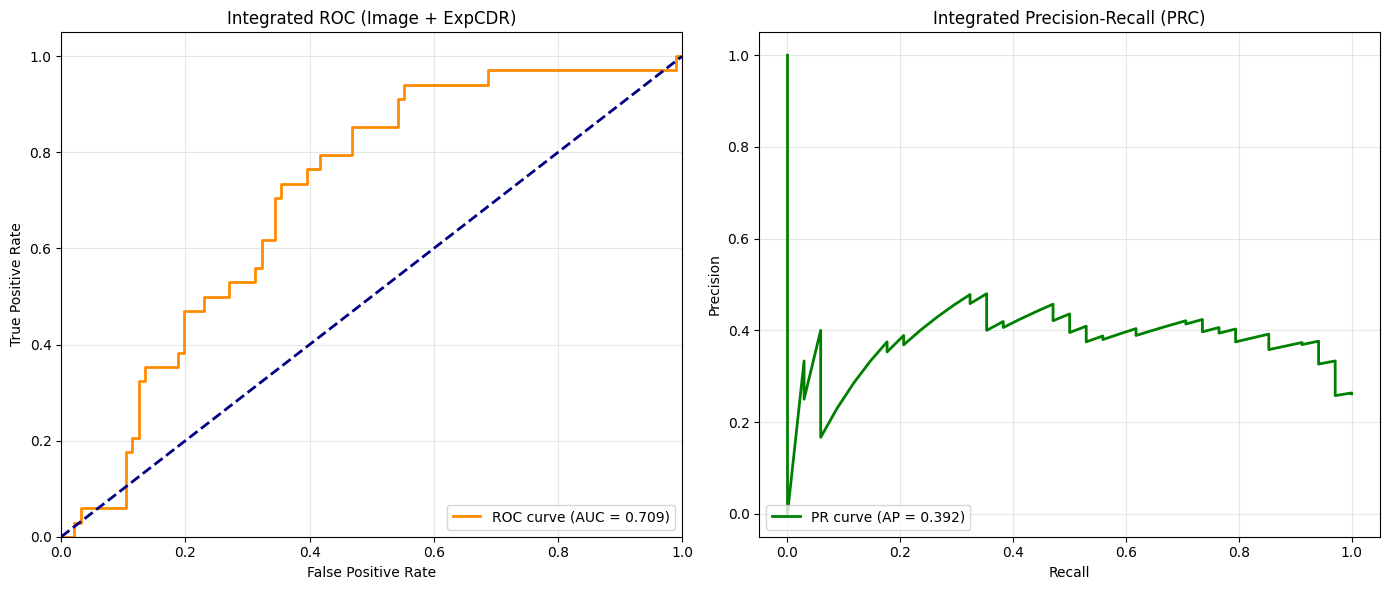

Summary Metrics:
AUROC Score: 0.7086
AUPRC Score: 0.3915


In [10]:
from glaucoma_vision.models.dl.evaluate_convnext import convnext_integrate
CONV_INT_PATH = os.path.join(WEIGHTS_DIR, 'convnext_integrated.pth')
convmetrix = convnext_integrate(CONV_INT_PATH, VAL_DIR, CSV_PATH)

Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
Using device: mps
Loading integrated ResNet-18 model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/resnet18_integrated.pth...
Model weights loaded successfully.
Running inference on validation set...

Integrated ResNet-18 Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative       0.83      0.76      0.79        96
Glaucoma_Positive       0.45      0.56      0.50        34

         accuracy                           0.71       130
        macro avg       0.64      0.66      0.65       130
     weighted avg       0.73      0.71      0.72       130



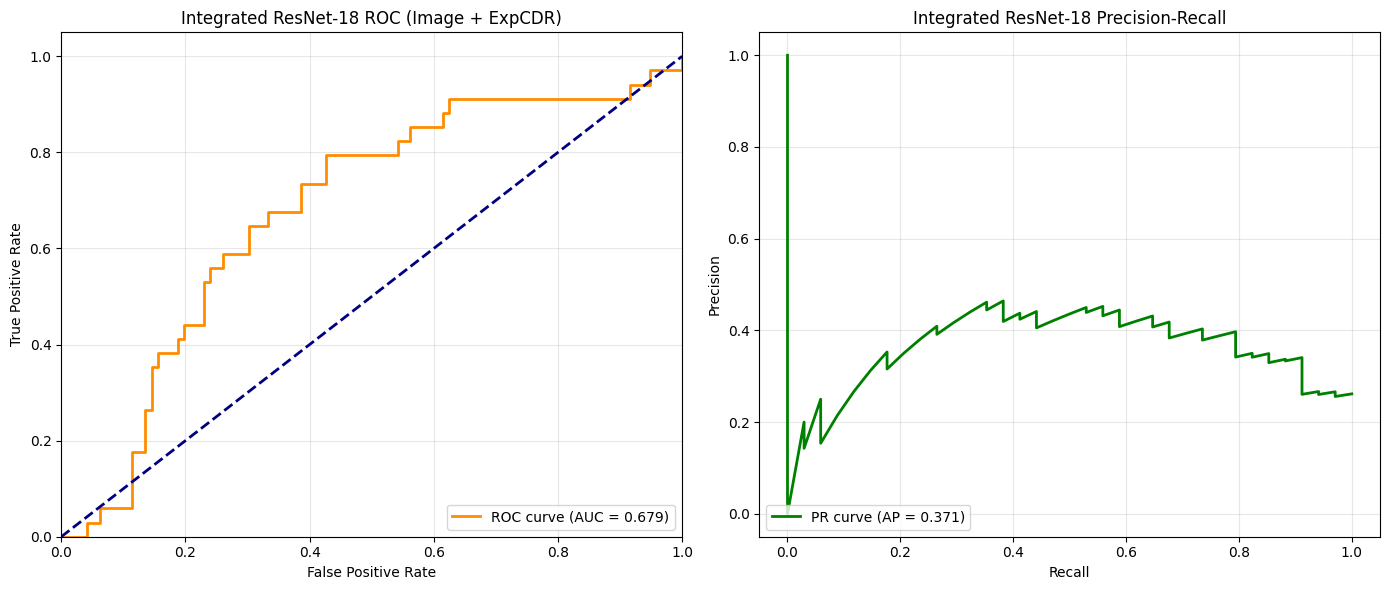

Summary Metrics (ResNet-18 + ExpCDR):
AUROC Score: 0.6792
AUPRC Score: 0.3713


In [5]:
from glaucoma_vision.models.dl.evaluate_resnet18 import resnet18_integrate
RESN_INT_PATH = os.path.join(WEIGHTS_DIR, 'resnet18_integrated.pth')
eval_results = resnet18_integrate(RESN_INT_PATH, VAL_DIR, CSV_PATH)


[Hybrid Evaluator] Loading Model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/densenet_integrated.pth...
[Hybrid Evaluator] Validation Path: /Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation
[Hybrid Evaluator] Valid samples in Validation set: 130

HYBRID MODEL PERFORMANCE METRICS
Glaucoma_Negative F1 score : 0.5571
Glaucoma_Positive F1 score : 0.4833
Accuracy                     : 0.5231
AUROC Score                  : 0.6814
AUPRC Score                  : 0.3974
--------------------------------------------------
Confusion Matrix -> TP: 29, TN: 39, FP: 57, FN: 5



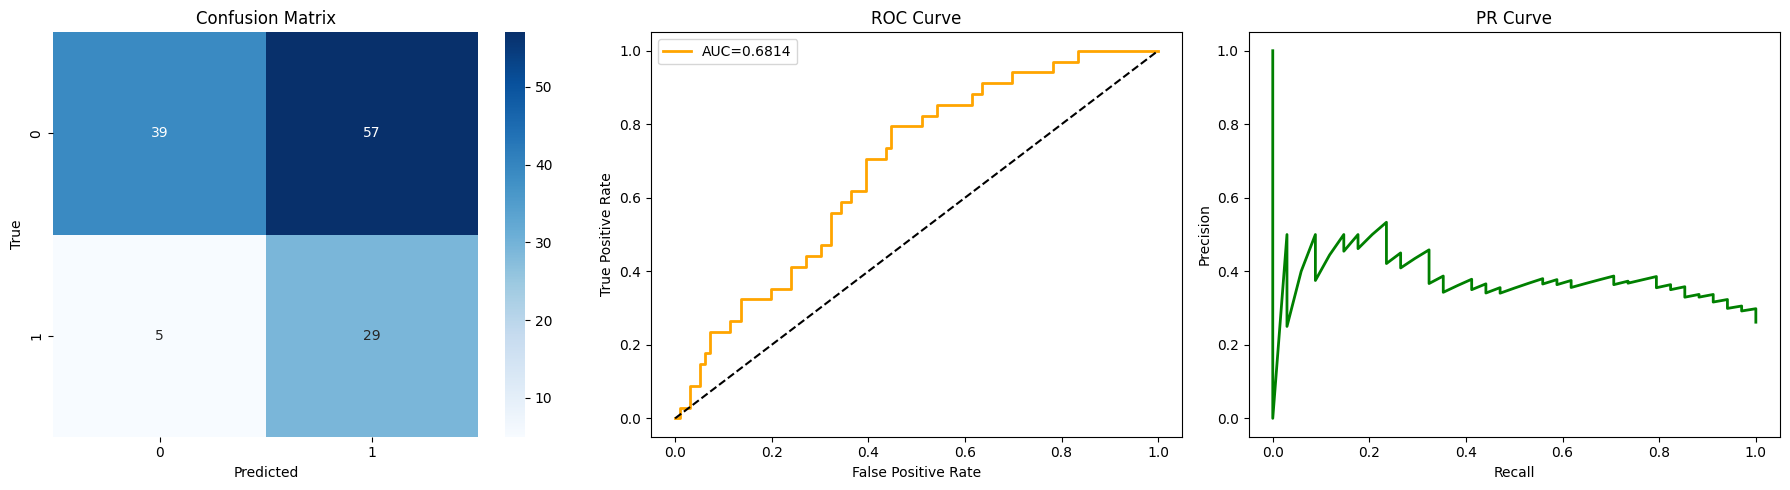


[Evaluator] Generating Hybrid Grad-CAM...


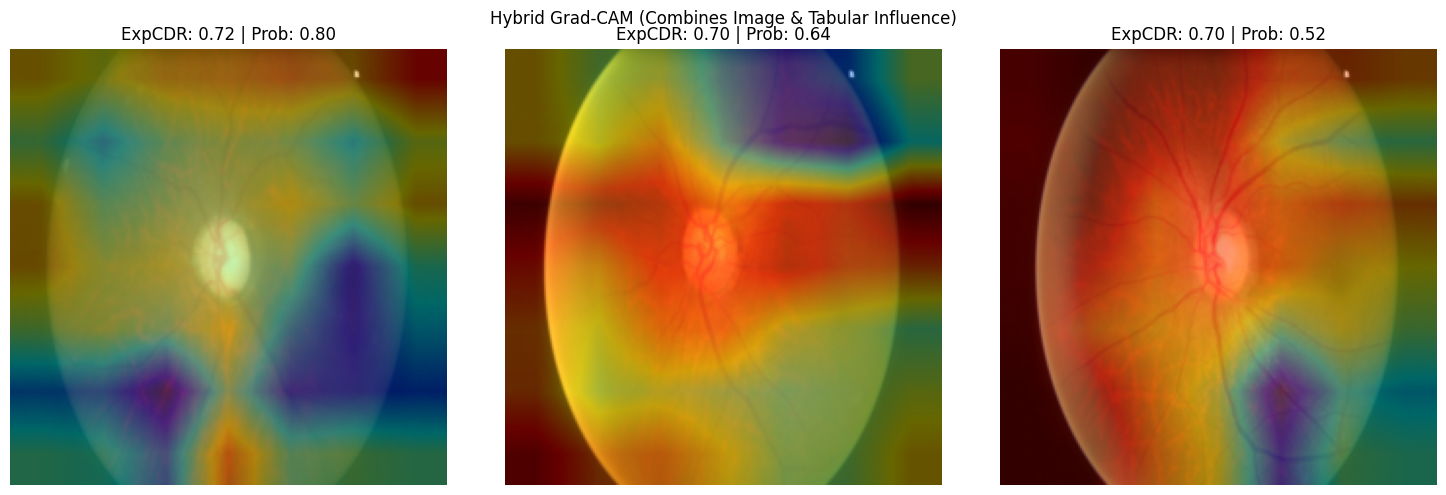

In [4]:
from glaucoma_vision.models.dl.evaluate_densenet import densenet_integrate
DENSE_INT_PATH = os.path.join(WEIGHTS_DIR, 'densenet_integrated.pth')
densenetmetrix = densenet_integrate(DENSE_INT_PATH, VAL_DIR, CSV_PATH)

Reading CSV metadata...
Loading validation data from: /Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation ...
Successfully loaded 130 samples.
Loading SVM model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/svm_integrated.pkl...
Model loaded successfully.
Running inference on validation set...

Classification Report (SVM Integrated)
                   precision    recall  f1-score   support

Glaucoma_Negative       0.79      0.84      0.81        96
Glaucoma_Positive       0.44      0.35      0.39        34

         accuracy                           0.72       130
        macro avg       0.62      0.60      0.60       130
     weighted avg       0.70      0.72      0.70       130

Confusion Matrix:
[[81 15]
 [22 12]]


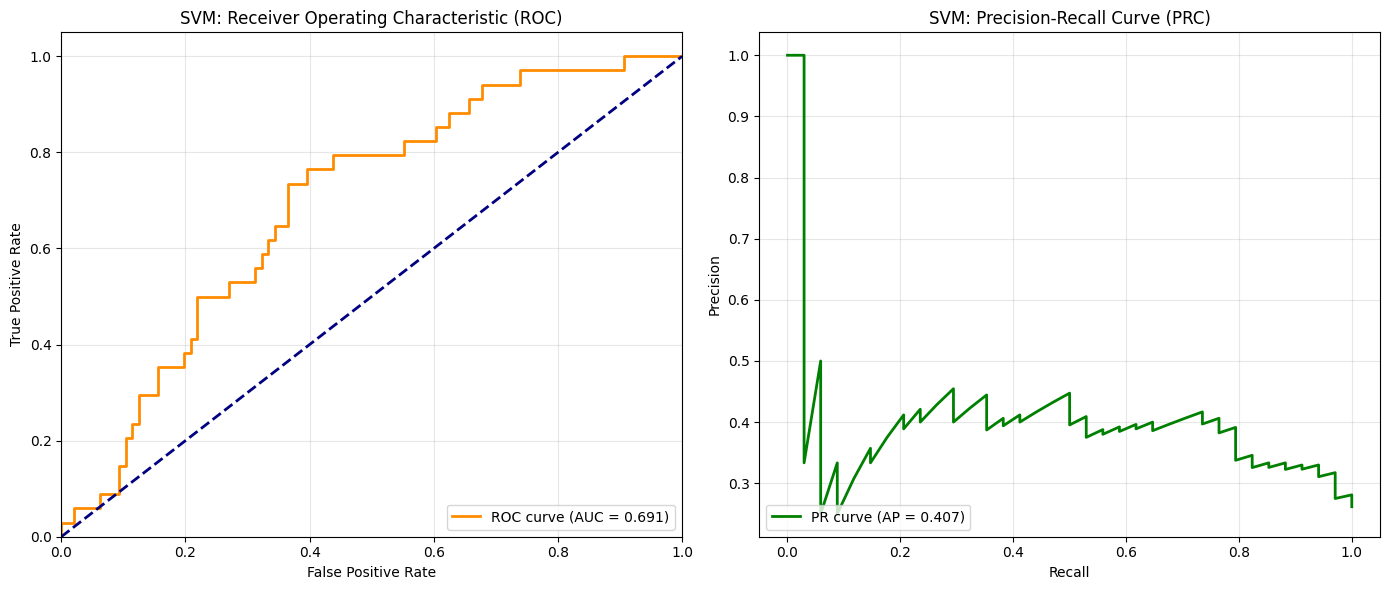

Summary Metrics:
AUROC Score: 0.6915
AUPRC Score: 0.4072


In [11]:
from glaucoma_vision.models.ml.evaluate_svm import svm_integrate
SVM_INT_PATH = os.path.join(WEIGHTS_DIR, 'svm_integrated.pkl')
eval_results = svm_integrate(SVM_INT_PATH, VAL_DIR, CSV_PATH)


=== Path Debug Information ===
Validation set directory: /Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation
Class folders: ['Glaucoma_Negative', 'Glaucoma_Positive']

[XGB Evaluator] Loading validation set data...
Total validation images found: 130
Negative samples (Glaucoma_Negative): 96
Positive samples (Glaucoma_Positive): 34


Processing sample data: 100%|██████████| 650/650 [00:01<00:00, 507.21it/s] 


Matched validation samples: 130 (full evaluation set)

[XGB Evaluator] Loading model and performing inference...

XGBoost (Hybrid Features) Validation Set Evaluation Report (130 samples)
                   precision    recall  f1-score   support

Glaucoma Negative       0.96      0.84      0.90        96
Glaucoma Positive       0.67      0.91      0.78        34

         accuracy                           0.86       130
        macro avg       0.82      0.88      0.84       130
     weighted avg       0.89      0.86      0.87       130

Core Evaluation Metrics:
  Accuracy:    0.8615
  AUROC:       0.9494
  AUPRC:       0.9108
  Sensitivity/Recall: 0.9118
  Specificity: 0.8438
  Confusion Matrix: True Negative(TN)=81, False Positive(FP)=15, False Negative(FN)=3, True Positive(TP)=31

[XGB Evaluator] Generating SHAP feature analysis plots (two plots side by side)...


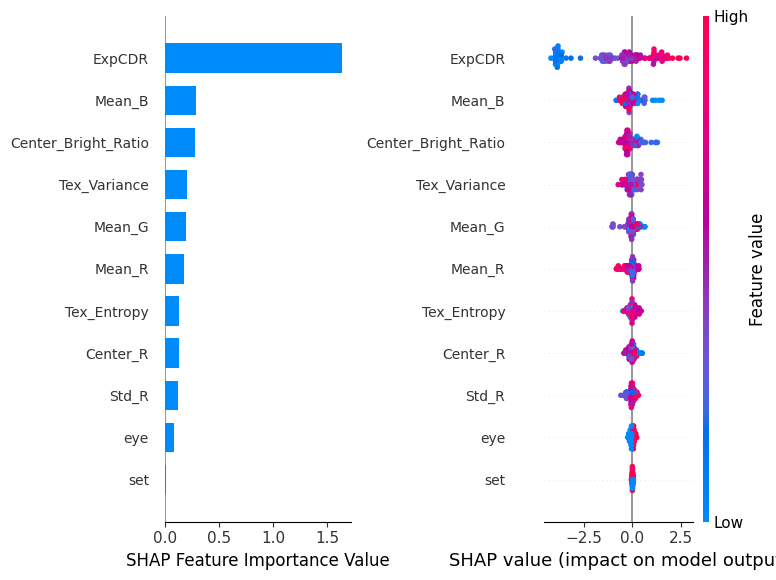

In [32]:
from glaucoma_vision.models.ml.evaluate_xgb import xgb_evaluate
XGB_INT_PATH = os.path.join(WEIGHTS_DIR, 'xgb_integrated.json')
eval_results = xgb_evaluate(XGB_INT_PATH, VAL_DIR, CSV_PATH)

In [ ]:
from glaucoma_vision.models.ml.evaluate_rf import rf_integrate
RF_INT_PATH = os.path.join(WEIGHTS_DIR, 'RF_integrated')
rf_metrics = rf_integrate(model_dir=MODEL_DIR,val_dir=VAL_DIR,csv_path=CSV_PATH)

[RF Evaluator] Starting Random Forest Evaluation Pipeline (with CSV ExpCDR support)
[RF Evaluator] Loading CSV metadata from: /Users/apple/Desktop/BIA 4/glaucoma.csv.xls

[RF Evaluator] Loading model and dependencies...
✓ Model loaded from: /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/RF_integrated/random_forest_csv_model.pkl
✓ Scaler loaded from: /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/RF_integrated/feature_scaler_csv.pkl
✓ Feature info loaded from: /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/RF_integrated/feature_info_csv.pkl

[RF Evaluator] Loading validation images and extracting features...
Validation set: 130 images (96 negative, 34 positive)
